## A/B Test: Conv1d-GPT 1.8M (7 Blocks) vs GPT 1.8M (9 Blocks)

In [1]:
import os
import re
import matplotlib.pyplot as plt

In [5]:
# helper functions
def extract_validation_losses(directory):
    pattern = re.compile(r"ckpt_i(\d+)_v(\d+_\d+)\.pt")
    data = []
    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            step = int(match.group(1))
            val_loss_str = match.group(2).replace('_', '.')
            val_loss = float(val_loss_str)
            data.append((step, val_loss))
    # Sort by iteration step
    data.sort(key=lambda x: x[0])
    # Unzip into two lists
    steps, val_losses = zip(*data) if data else ([], [])
    return steps, val_losses

def AB_test(dir1, dir2):
    steps1, losses1 = extract_validation_losses(dir1)
    steps2, losses2 = extract_validation_losses(dir2)
    plt.figure(figsize=(10, 6))
    plt.plot(steps1, losses1, label='conv1d_gpt', marker='o')
    plt.plot(steps2, losses2, label='gpt', marker='x')
    plt.xlabel('Iteration Step')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss Comparison')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

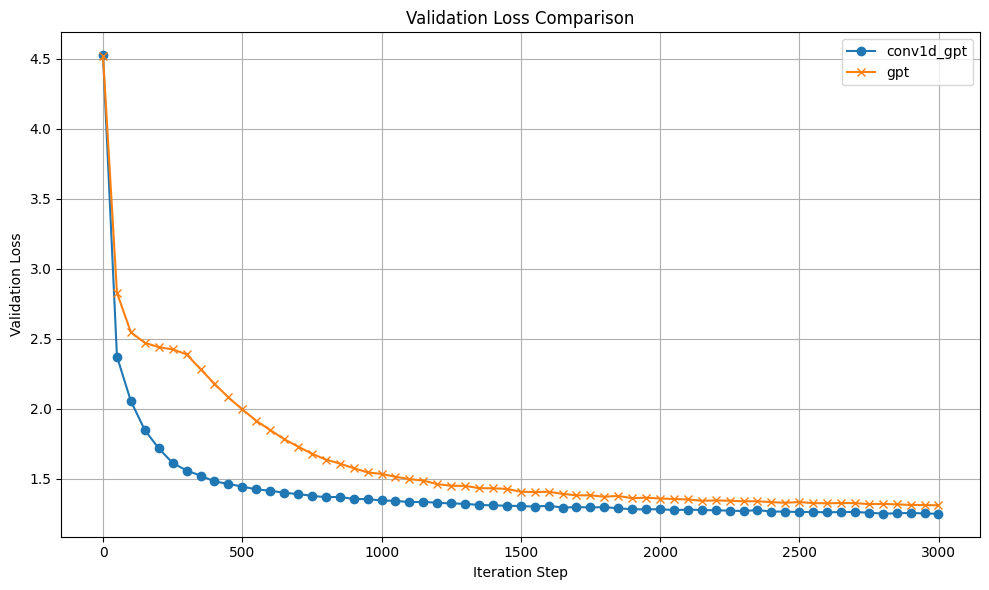

In [19]:
dir1 = './conv1d_gpt_checkpoints'
dir2 = './gpt_checkpoints'
AB_test(dir1, dir2)